## Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [626]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [627]:
df = pd.read_csv('sonar.all-data.csv')

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [629]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [630]:
df['Label'].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

In [631]:
df['Label'] = df['Label'].map({'R':0, 'M':1})
df['Label'].value_counts()

Label
1    111
0     97
Name: count, dtype: int64

In [632]:
print(f'Duplicated rows: {df.duplicated().sum()}')
print(f'Missing values: {df.isna().sum().sum()}')

Duplicated rows: 0
Missing values: 0


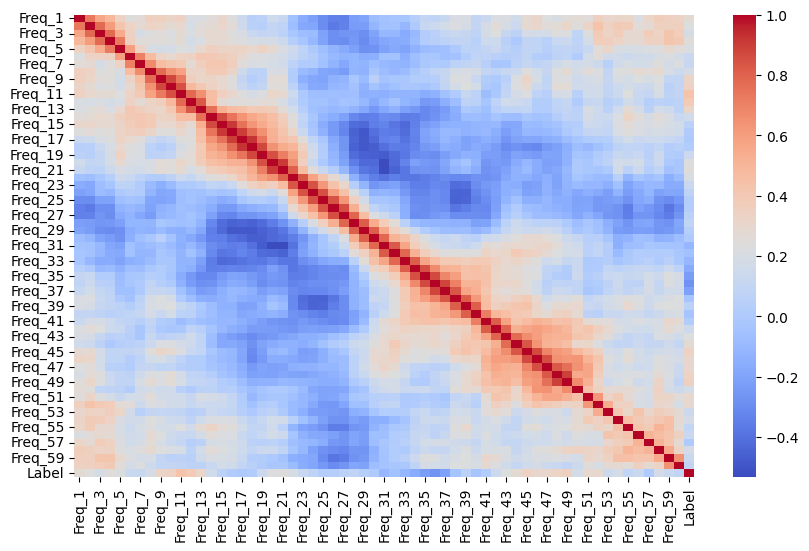

In [633]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(numeric_only=True), cmap='coolwarm');

In [634]:
X = df.drop('Label', axis=1)
y = df['Label']

In [635]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=44)

In [636]:
base_model = KNeighborsClassifier(n_neighbors=7)
base_model.fit(X_train, y_train)
base_model_y_pred = base_model.predict(X_test)
print(accuracy_score(y_test, base_model_y_pred))

0.7307692307692307


In [637]:
print(classification_report(y_test, base_model_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        24
           1       0.75      0.75      0.75        28

    accuracy                           0.73        52
   macro avg       0.73      0.73      0.73        52
weighted avg       0.73      0.73      0.73        52



In [638]:
base_pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=7))
base_pipe.fit(X_train, y_train)
base_pipe_pred = base_pipe.predict(X_test)
print(classification_report(y_test, base_pipe_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.82      0.82      0.82        28

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



In [639]:
test_accuracy = []
train_accuracy = []
k_values = list(range(1,30))
for k in k_values:
    pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=k))
    pipe.fit(X_train, y_train)
    pipe_train_pred = pipe.predict(X_train)
    train_acc = accuracy_score(y_train, pipe_train_pred)
    train_accuracy.append(train_acc)

    pipe_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, pipe_pred)
    test_accuracy.append(test_acc)

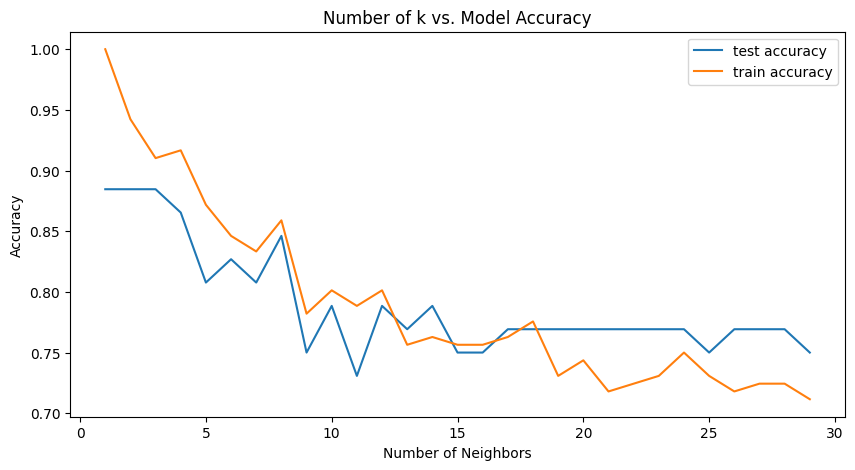

In [640]:
plt.figure(figsize=(10,5))
plt.plot(k_values,test_accuracy, label='test accuracy')
plt.plot(k_values,train_accuracy, label='train accuracy')
plt.title('Number of k vs. Model Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

In [641]:
model_pipe = Pipeline([('scaler', StandardScaler()),
                       ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors':list(range(1,30)),
              'knn__weights': ['uniform','distance']              
              }

grid = GridSearchCV(model_pipe,
                    param_grid,
                    cv=5,
                    scoring='accuracy')

In [642]:
grid.fit(X_train,y_train)
grid.best_params_

{'knn__n_neighbors': 2, 'knn__weights': 'uniform'}

In [643]:
test_pred = grid.predict(X_test)
test_accuracy = accuracy_score(y_test,test_pred)

train_pred = grid.predict(X_train)
train_accuracy = accuracy_score(y_train,train_pred)

print(f'Test accuracy: {test_accuracy}')
print(f'Train accuracy: {train_accuracy}')

Test accuracy: 0.8846153846153846
Train accuracy: 0.9423076923076923


In [644]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.79      0.88        28

    accuracy                           0.88        52
   macro avg       0.90      0.89      0.88        52
weighted avg       0.91      0.88      0.88        52



## Performance Summary

**Train accuracy:** `0.9423`
**Test accuracy:** `0.8846`

**Generalization gap:** `~0.058` (≈5.8 pp) indicates mild overfitting but not alarming.



### Class-wise Metrics

* **Class 0**

  * **Precision:** `0.80` indicates that of the 30 predictions labeled **0**, **6** were actually class 1
  * **Recall:** `1.00` caught all class-0 cases
* **Class 1 (positive)**

  * **Precision:** `1.00` no false positives
  * **Recall:** `0.79` indicates **missed 6/28 positives**


## Interpretation

* The model is **conservative about predicting class 1**: it avoids false positives entirely but **misses ~21%** of actual class-1 cases.

## What to Do Next

**If missing class-1 (e.g., “mine”) is worse → maximize recall:**

* Lower the **decision threshold** for class 1.
* **Tune for recall / PR-AUC** (not just accuracy).
* Apply **probability calibration** (Platt/Isotonic) and pick an operating point from **ROC/PR curves**.
* Add data/features & regularize to reduce the train–test gap.

**If false positives are costlier → keep high precision, nudge recall:**

* Keep a higher threshold, explore small decreases while monitoring FP rate.
* Use targeted features or model tuning to gain recall **without** introducing many FPs.


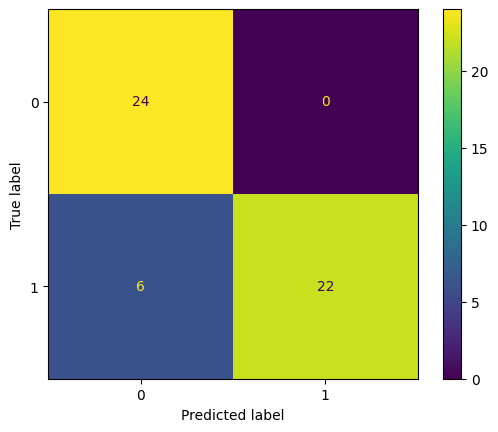

In [645]:
ConfusionMatrixDisplay.from_estimator(grid,X_test, y_test);

In [646]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001799,0.000229,0.006304,0.000392,1,uniform,"{'knn__n_neighbors': 1, 'knn__weights': 'unifo...",0.78125,0.903226,0.838710,0.806452,0.838710,0.833669,0.040933,2
1,0.002363,0.000499,0.008057,0.000864,1,distance,"{'knn__n_neighbors': 1, 'knn__weights': 'dista...",0.78125,0.903226,0.838710,0.806452,0.838710,0.833669,0.040933,2
2,0.002077,0.000635,0.006231,0.000474,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",0.87500,0.870968,0.870968,0.774194,0.838710,0.845968,0.038202,1
3,0.002190,0.000474,0.007837,0.000543,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.78125,0.903226,0.838710,0.806452,0.838710,0.833669,0.040933,2
4,0.001731,0.000225,0.006325,0.000536,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.75000,0.838710,0.838710,0.774194,0.806452,0.801613,0.035189,6
5,0.002266,0.000361,0.007942,0.000608,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.75000,0.838710,0.838710,0.774194,0.806452,0.801613,0.035189,6
6,0.001697,0.000160,0.006179,0.000657,4,uniform,"{'knn__n_neighbors': 4, 'knn__weights': 'unifo...",0.84375,0.741935,0.774194,0.806452,0.774194,0.788105,0.034501,8
7,0.002337,0.000565,0.008090,0.000663,4,distance,"{'knn__n_neighbors': 4, 'knn__weights': 'dista...",0.78125,0.774194,0.838710,0.806452,0.838710,0.807863,0.027375,5
8,0.002081,0.000384,0.006227,0.000851,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.87500,0.709677,0.741935,0.838710,0.741935,0.781452,0.063725,11
9,0.002281,0.000512,0.007699,0.000497,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.87500,0.709677,0.741935,0.838710,0.774194,0.787903,0.060971,9
